In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df = pd.read_csv("Promo_Abuse_Detection_Dataset.csv")

In [14]:
print(df.columns)

Index(['Unnamed: 0', 'FirstName', 'LastName', 'Dob', 'Gender', 'UserId',
       'Status', 'Email', 'Mobile', 'ProgramId', 'ProgramName', 'PostalCode',
       'BadTryCount', 'LastLoginTime', 'PresentLoginTime', 'RegisteredOn',
       'OS Type', 'Reg Referral Code', 'Reg Referral Prefix',
       'Ref PC AC Number', 'Reg Client IP', 'Device Id', 'Sim Id', 'Meta Data',
       'Cluster'],
      dtype='object')


In [4]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Handle missing values
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
joblib.dump(scaler, "hierarchical_scaler.pkl")


['hierarchical_scaler.pkl']

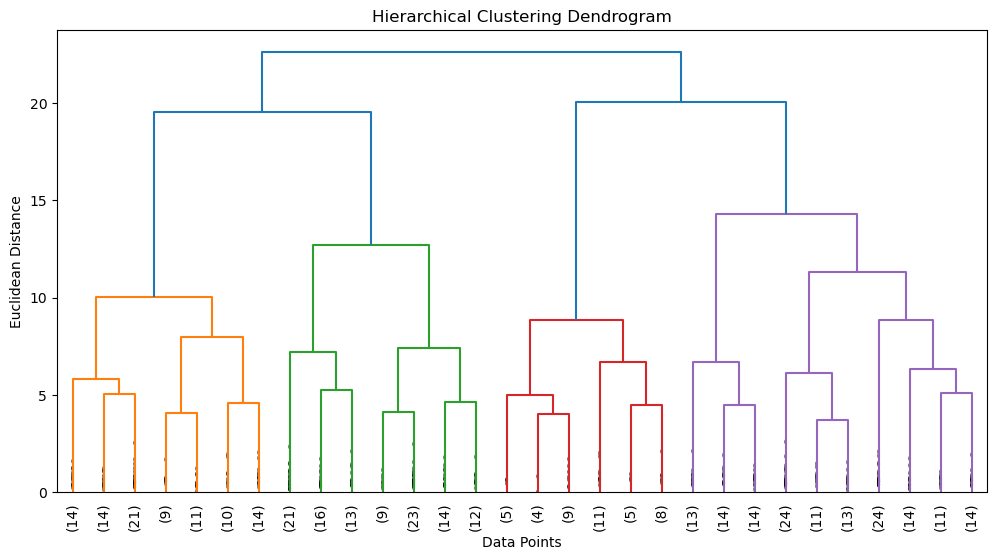

In [5]:
# Linkage for dendrogram
linked = linkage(scaled_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90, 
           leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [6]:
# Choose clusters
clusters = fcluster(linked, t=3, criterion='maxclust')
df['Cluster'] = clusters

In [8]:
joblib.dump(linked, "hierarchical_linkage.pkl")
joblib.dump(clusters, "hierarchical_clusters.pkl")

['hierarchical_clusters.pkl']

In [16]:
risk_feature = 'BadTryCount' 

if risk_feature in df.columns:
    cluster_stats = df.groupby('Cluster')[risk_feature].mean().sort_values()
    risk_map = {}

    sorted_clusters = cluster_stats.index.tolist()
    risk_map[sorted_clusters[0]] = 'Low Risk'
    if len(sorted_clusters) > 1:
        risk_map[sorted_clusters[1]] = 'Medium Risk'
    if len(sorted_clusters) > 2:
        risk_map[sorted_clusters[2]] = 'High Risk'

    df['Risk_Level'] = df['Cluster'].map(risk_map)

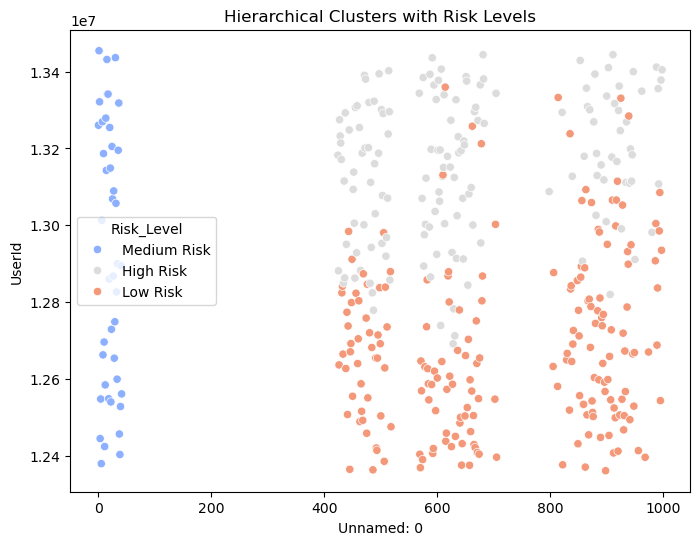

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x=numeric_df.columns[0], 
    y=numeric_df.columns[1], 
    hue='Risk_Level', 
    palette='coolwarm'
)
plt.title('Hierarchical Clusters with Risk Levels')
plt.show()


In [19]:
df.to_csv("Promo_Abuse_Clustered_Risk.csv", index=False)
print("✅ Model, scaler, and clustered dataset with risk labels saved successfully.")

✅ Model, scaler, and clustered dataset with risk labels saved successfully.
